Aluna: Ingrid Rieser Lopes de Oliveira. R.A: 22.6980-1
Análise de Dados e Tomada de Decisões

In [ ]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Sex_male', ylabel='count'>

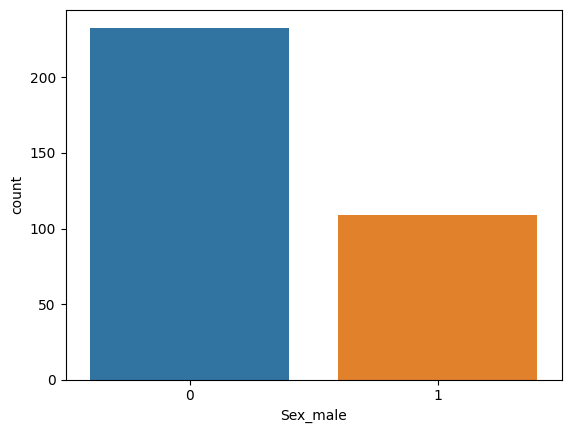

In [ ]:
sobreviventes = df[df['Survived'] == 1]
contagemDeSobreviventesPorSexo = sobreviventes['Sex_male'].value_counts()
sns.countplot(x='Sex_male', data=sobreviventes)

<Axes: xlabel='Pclass', ylabel='count'>

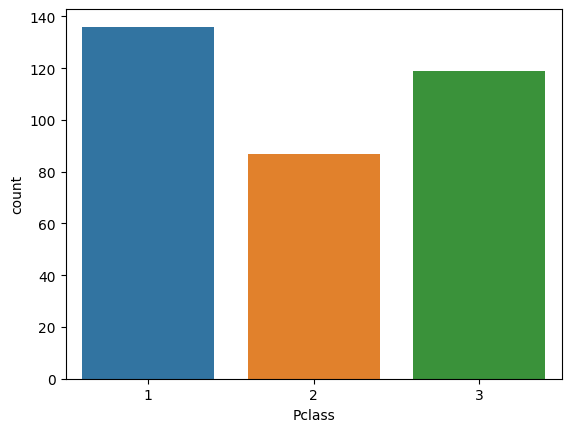

In [ ]:
sobreviventes = df[df['Survived'] == 1]
contagemDeSobreviventesPorClasses = sobreviventes['Pclass'].value_counts()
sns.countplot(x='Pclass', data=sobreviventes)

<Axes: xlabel='Age', ylabel='Density'>

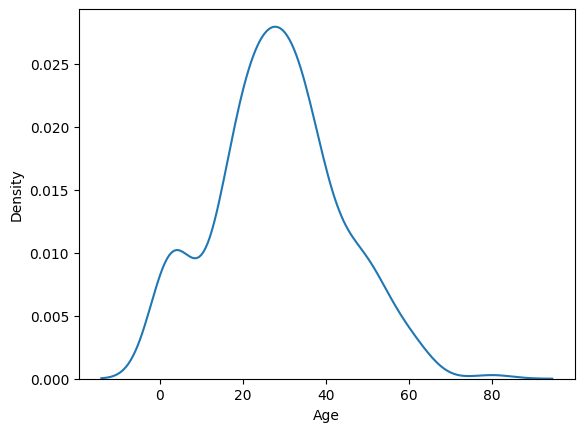

In [ ]:
sobreviventes = df[df['Survived'] == 1]
contagemDeSobreviventesPorIdade = sobreviventes['Age'].value_counts()
sns.kdeplot(x='Age', data=sobreviventes)

In [ ]:
mediaPorIdadeDeQuemSobreviveu = sobreviventes['Age'].mean()
mediaPorIdadeDeQuemSobreviveu

28.343689655172415

In [ ]:
mortos = df[df['Survived'] == 0]
mediaPorIdadeDeQuemMorreu = mortos['Age'].mean()
mediaPorIdadeDeQuemMorreu

30.62617924528302

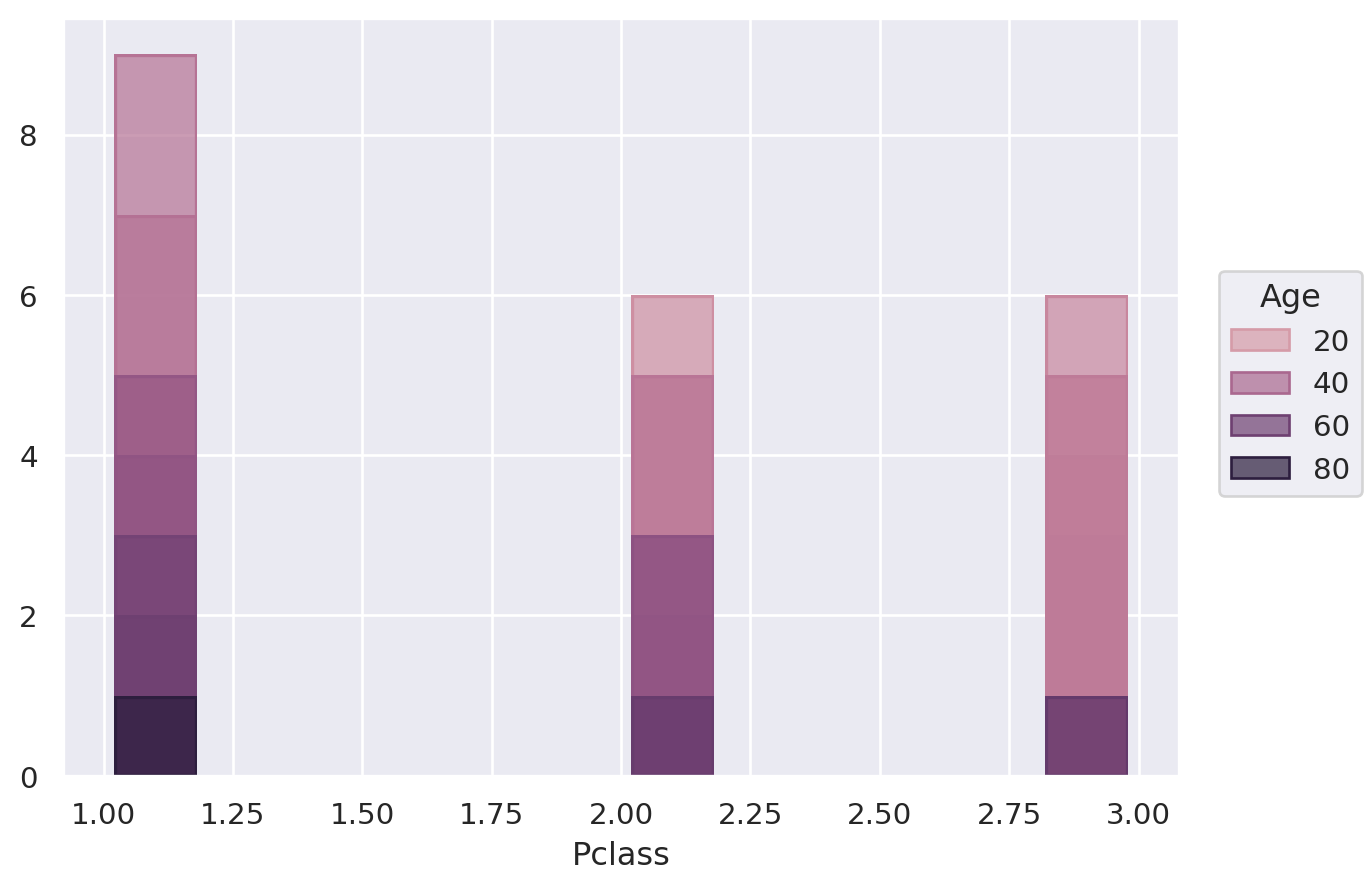

In [ ]:
# Mortos por classe e idade
so.Plot(mortos, x="Pclass", color="Age").add(so.Bar(), so.Hist())

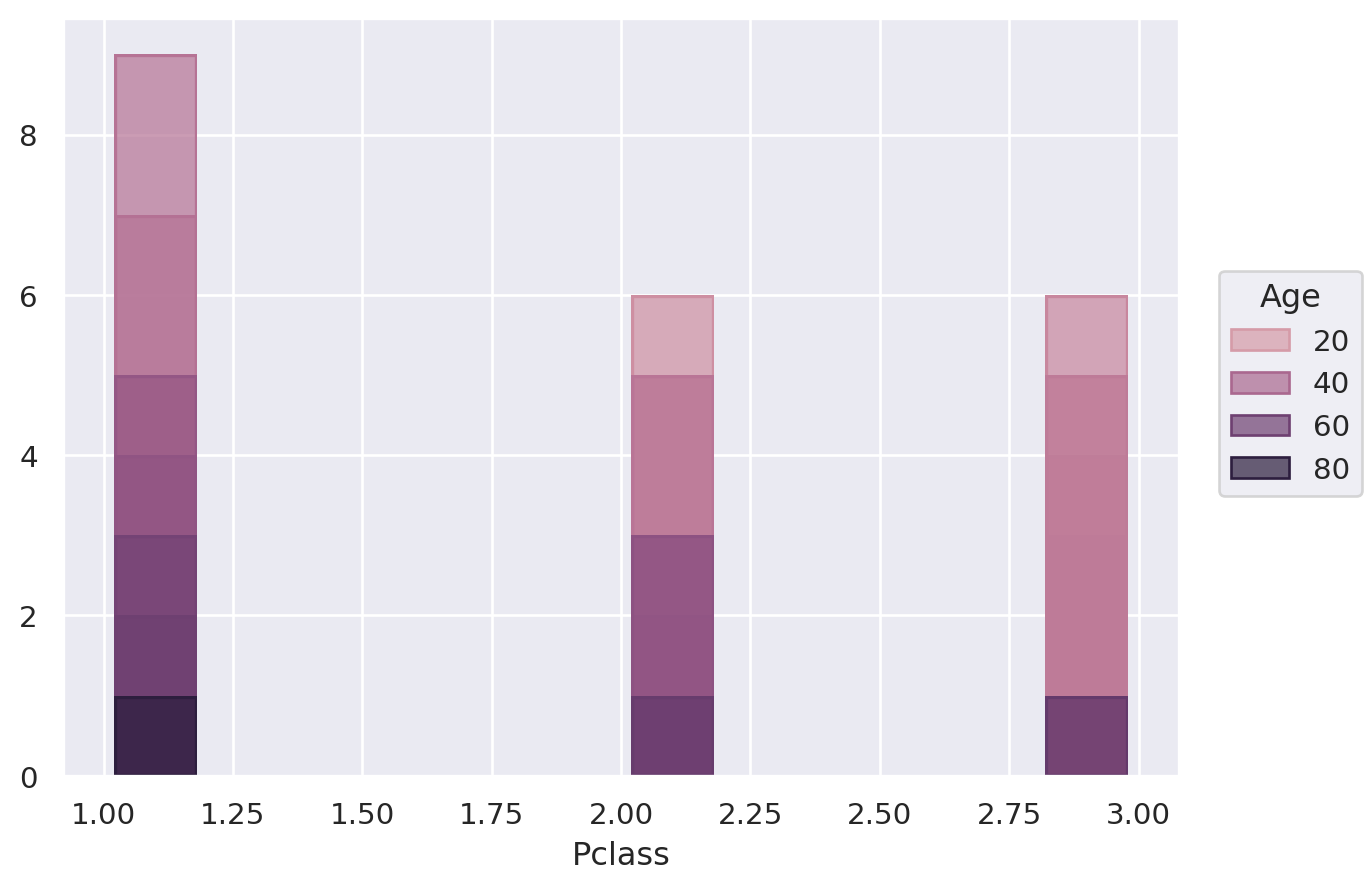

In [ ]:
#Sobreviventes

so.Plot(sobreviventes, x="Pclass", color="Age").add(so.Bar(), so.Hist())

In [ ]:
variacaoDaTarifaDosMortos =  mortos['Fare'].diff()
variacaoDaTarifaDosMortos

0          NaN
4       0.8000
5       0.4083
6      43.4042
7     -30.7875
        ...   
884    -3.4500
885    22.0750
886   -16.1250
888    10.4500
890   -15.7000
Name: Fare, Length: 549, dtype: float64

In [ ]:
variacaoDaTarafiaDosSobrevivents =  sobreviventes['Fare'].diff()
variacaoDaTarafiaDosSobrevivents

1          NaN
2     -63.3583
3      45.1750
8     -41.9667
9      18.9375
        ...   
875   -16.7750
879    75.9333
880   -57.1583
887     4.0000
889     0.0000
Name: Fare, Length: 342, dtype: float64

In [ ]:
contagemTotal = df['Pclass'].value_counts()
porcentagem = contagemDeSobreviventesPorClasses / contagemTotal * 100
porcentagem

1    62.962963
2    47.282609
3    24.236253
Name: Pclass, dtype: float64

Aqui usei como base somente a coluna Idade para prever os sobreviventes

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
idade_X = df['Age'].values.reshape(-1,1)
idade_y = df['Survived']
treino_idade_X, teste_idade_X, treino_idade_y, teste_idade_y = train_test_split(idade_X, idade_y, test_size=0.2, random_state=42)

modelo_idade = LinearRegression()


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
modelo_idade.fit(treino_idade_X, treino_idade_y)

LinearRegression()

In [ ]:
teste_idade_X = imputer.fit_transform(teste_idade_X)
idade_predict = modelo_idade.predict(teste_idade_X)

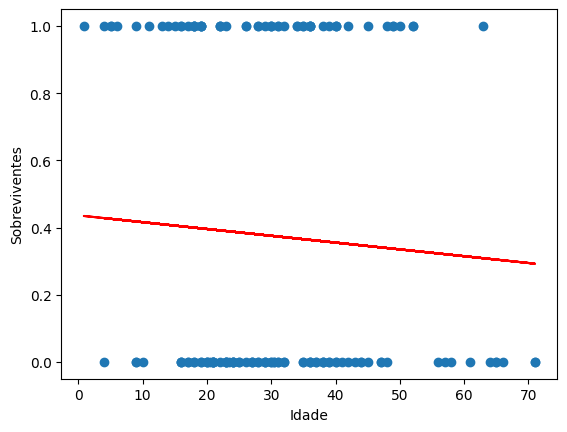

In [ ]:
##plotar grafico
plt.scatter(teste_idade_X, teste_idade_y)
plt.xlabel('Idade')
plt.ylabel('Sobreviventes')
plt.plot(teste_idade_X, idade_predict, color='red')

E o resultado da acuracidade é bem ruim, pois ela não é suficiente para saber quem sobreviveria ao desastre.

In [ ]:
r2 = r2_score(teste_idade_y, idade_predict)
r2

0.004888855615906018

In [ ]:
# Aqui adicionei as colunas de Idade, Classe e Sexo pois como visto nos graficos acima, são elas que interferem em que irá sobreviver ou não
df = df.fillna(df.mean())
# df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

y = df['Survived']
X = df[['Age', 'Pclass', 'Sex_male', 'Fare']]



<ipython-input-106-c4907ede4d19>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier()
arvore.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = arvore.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.776536312849162

E no final temos um teste de acuracidade bem mais aceitavel.